In [1]:
# Render our plots inline
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import label_binarize
import numpy as np

matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

#train = pd.read_csv('/Users/Kseniya/diplom/src/text_preprocess/linis_csv/train.csv')
train = pd.read_csv('/Users/Kseniya/diplom/src/text_preprocess/linis_senti_csv/senti_train.csv')
print train.shape
print "======="
#test = pd.read_csv('/Users/Kseniya/diplom/src/text_preprocess/linis_csv/test.csv')
test = pd.read_csv('/Users/Kseniya/diplom/src/text_preprocess/linis_senti_csv/senti_test.csv')
print test.shape

(2219, 52132)
(957, 52132)


NameError: name 'target_orig' is not defined

In [2]:
# prepare data
def target_three_classes(target_col):
    target_res = pd.Series()
    for row in target_col:
        if row == -1 or row == 0 or row == 1:
            target_res.loc[len(target_res)] = row
            continue
        if row < -1:
            target_res.loc[len(target_res)] = -1
        else:
            target_res.loc[len(target_res)] = 1
    return target_res

# separate target column
# prepare for multiclass classification
train_targets = target_three_classes(train['target'])
train_targets_bin = label_binarize(train_targets, classes=[-1, 0, 1])
train.drop('target', axis=1, inplace=True)
assert(len(train_targets.unique()) == 3)

# prepare test data
test_targets = target_three_classes(test['target'])
test_targets_bin = label_binarize(test_targets, classes=[-1, 0, 1])
test.drop('target', axis=1, inplace=True)
assert(len(test_targets.unique()) == 3)

# replace nan values with zero value
def data_preprocess(data):
    # Nan -> 0
    new_data = data.fillna(0)
    return new_data


print "Train "
train = data_preprocess(train)
print train.shape
print train_targets.shape
print train_targets_bin.shape

print "Test "
test = data_preprocess(test)
print test.shape
print test_targets.shape
print test_targets_bin.shape
#train.isnull().sum().sum()

Train 
(2219, 52131)
(2219, 52131)
(2219, 52131)
(2219,)
(2219, 3)
Test 
(957, 52131)
(957, 52131)
(957, 52131)
(957,)
(957, 3)


In [7]:
# classification into 3 classes
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import cross_validation
from sklearn import svm
from sklearn.linear_model import BayesianRidge, LinearRegression,LogisticRegression

classifiers = [
    {'type': "random_forest", 'classifier': RandomForestClassifier, 'params': {'n_estimators': 1000, 'n_jobs': 4}, 'y_score': np.array([])}, 
    #{'type': "ada boost", 'classifier': AdaBoostClassifier, 'params': {'n_estimators': 15}, 'y_score': np.array([])},
    #{'type': "logistic regression", 'classifier': LogisticRegression, 'params': {
    #                                                                    'solver': 'newton-cg',
    #                                                                    'multi_class': 'ovr',
    #                                                                    'n_jobs': 4}},
    #{'type': "liner regression", 'classifier': LinearRegression, 'params': {
    #                                                                'copy_X': True,
    #                                                                'normalize': True,
    #                                                                'n_jobs': 4}},
    #{'type': "bayes ridge", 'classifier': BayesianRidge, 'params': {}},
    #{'type': "svm linear", 'classifier': svm.SVC, 'params': {'kernel': 'linear' }},
    #{'type': "svm poly 3", 'classifier': svm.SVC, 'params': {'kernel': 'poly', 'degree': 3 }},
    #{'type': "svm poly 2", 'classifier': svm.SVC, 'params': {'kernel': 'poly', 'degree': 2 }}, 
    #{'type': "svm linear", 'classifier': svm.SVC, 'params': {'kernel': 'sigmoid', 'coef0': 1 }}, 
]

In [4]:
def draw_roc_for_n_class(fpr, tpr, roc_auc, classes, func_name):        
    # Plot of a ROC curve for a specific class - "positive"
    plt.figure()
    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], label=classes[i] + ': ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(func_name)
    plt.legend(loc="lower right")
    plt.show()

In [5]:
def draw_prec_recall_for_n_classes(recall, precision, average_precision, class_names, func_name):
    plt.figure()
    plt.plot(recall["micro"], precision["micro"],
                 label='micro-average Precision-recall curve (area = {0:0.2f})'
                       ''.format(average_precision["micro"]))
    for i in range(len(class_names)):
        print i
        plt.plot(recall[i], precision[i],
                 label=class_names[i] + 'Precision-recall curve of class (area = {})'
                           ''.format(average_precision[i]))

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Extension of Precision-Recall curve to multi-class for ' + func_name)
    plt.legend(loc="lower right")
    plt.show()

In [8]:
# prepare for multiclass classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cross_validation import train_test_split

def get_y_score_for_classifiers(classes, train_set, target_set):
    X_train, X_test, y_train, y_test = train_test_split(train_set, target_set, test_size=.3,
                                                    random_state=0)
    for c in classes:
        params = dict(c.get('params', {}))
        classifier = c['classifier']
        
        print "classifier " + c['type']
        classifier = OneVsRestClassifier(classifier(**params))
        y_score = classifier.fit(X_train, y_train).predict(X_test)
        c['y_score'] = y_score
        
    return y_test

In [9]:
class_y_test = get_y_score_for_classifiers(classifiers, train, train_targets_bin)

classifier random_forest


In [11]:
from sklearn.metrics import roc_curve, auc

def roc_auc_draw(classes, y_test):
    for c in classes:
        y_score = c['y_score']
        if y_score is None:
            continue
            
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        # Compute ROC curve and ROC area for each class
        for i in range(y_test.shape[1]):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            
        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"]) 
        
        # draw plots
        draw_roc_for_n_class(fpr, tpr, roc_auc, ['negative', 'neitral', 'positive'], c['type'])       
            


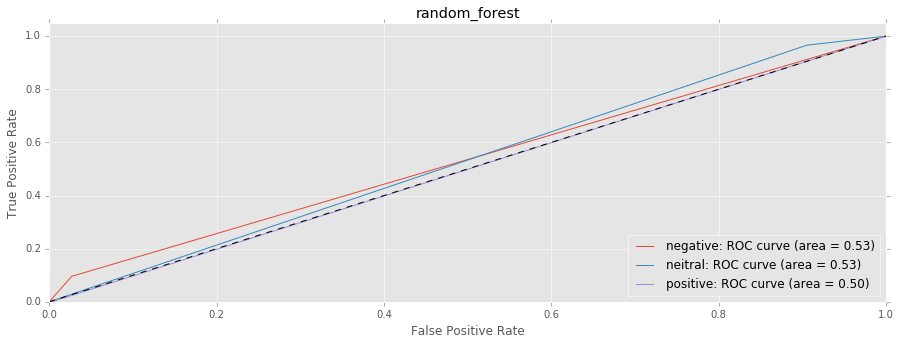

In [12]:
roc_auc_draw(classifiers, class_y_test)

In [80]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

def prec_recall_draw(classes, y_test, class_labels=['negative', 'neitral', 'positive']):
    for c in classes:
        y_score = c['y_score']
        if y_score is None:
            continue 
        # Compute Precision-Recall and plot curve
        precision = dict()
        recall = dict()
        average_precision = dict()
        for i in range(y_test.shape[1]):
            precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                                y_score[:, i])
            average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

        # Compute micro-average ROC curve and ROC area
        precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
                                                                        y_score.ravel())
        average_precision["micro"] = average_precision_score(y_test, y_score,
                                                             average="micro")
       
        # Plot Precision-Recall curve for each class
        draw_prec_recall_for_n_classes(recall, precision, average_precision, class_labels, c['type'])
        

0
1
2


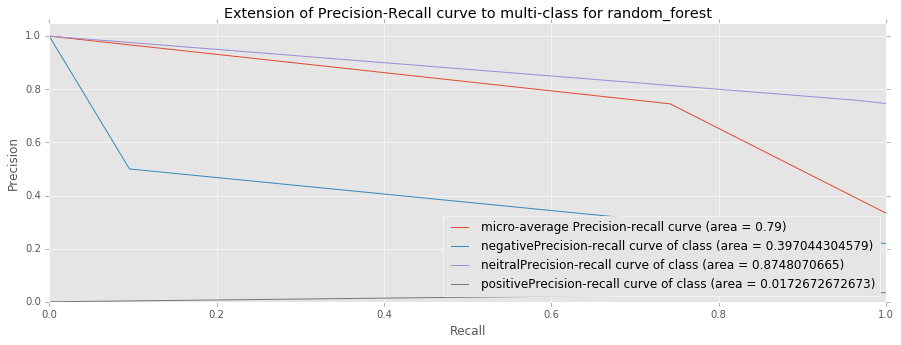

In [15]:
prec_recall_draw(classifiers, class_y_test)

In [8]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, auc

def roc_auc_for_classifiers(classes, train_set, target_set):
    X_train, X_test, y_train, y_test = train_test_split(train_set, target_set, test_size=.3,
                                                    random_state=0)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for c in classes:
        params = dict(c.get('params', {}))
        classifier = c['classifier']
        #classifier_cross_val = OneVsRestClassifier(classifier(**params))
        
        # cross validation
        #cross_val_res = cross_validation.cross_val_score(classifier_cross_val, train_set, target_set, n_jobs=4, scoring='roc_auc').mean()
        #print "{}: {}\n".format(c['type'], cross_val_res)
        
        # roc auc
        classifier = OneVsRestClassifier(classifier(**params))
        y_score = classifier.fit(X_train, y_train).predict(X_test)
        
        # Compute ROC curve and ROC area for each class
        for i in range(y_train.shape[1]):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            
        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"]) 
        
        # draw plots
        draw_roc_for_n_class(fpr, tpr, roc_auc, ['negative', 'neitral', 'positive'], c['type'])        

In [9]:
import xgboost
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, auc


def xgboost_test(train_set_orig, target_set_orig):
    params = {
        'max_depth': 6,
        'max_delta_step': 5,
        'base_score': 0.7,
        'n_estimators': 100,
        'min_child_weight': 1,
        'learning_rate': 0.02,
        'subsample': 0.7,
        'colsample_bytree': 0.6,
        'scale_pos_weight': 0.5
    }    

    xgb_clf = xgboost.XGBClassifier(missing=np.nan, nthread=4, seed=13, 
                                 n_estimators=int(params['n_estimators']),
                                 base_score=params['base_score'],
                                 max_depth=int(params['max_depth']),
                                 max_delta_step=int(params['max_delta_step']),
                                 min_child_weight=params['min_child_weight'],
                                 learning_rate=params['learning_rate'],
                                 subsample=params['subsample'],
                                 scale_pos_weight=params['scale_pos_weight'],
                                 colsample_bytree=params['colsample_bytree'])

    X_train, X_test, y_train, y_test = train_test_split(train_set_orig, target_set_orig,
                                                        test_size=.3, random_state=0)
    y_test = label_binarize(y_test, classes=[-1, 0, 1])

    print "fitting the model ... "
    y_score = xgb_clf.fit(X_train, y_train).predict_proba(X_test)
        
    print "compute roc-auc.."    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    # Compute ROC curve and ROC area for each class
    for i in range(y_test.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
            
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"]) 
        
    # draw plots
    draw_roc_for_n_class(fpr, tpr, roc_auc, ['negative', 'neitral', 'positive'], "xgboost")        


In [73]:
import xgboost
from sklearn.cross_validation import train_test_split

def get_y_score_for_xgboost(train_set_orig, target_set_orig, test_set):
    # prev
    #params = {
    #   'max_depth': 6,
    #   'max_delta_step': 5,
    #    'base_score': 0.7,
    #    'n_estimators': 100,
    #    'min_child_weight': 1,
    #    'learning_rate': 0.02,
    #    'subsample': 0.7,
    #    'colsample_bytree': 0.6,
    #    'scale_pos_weight': 0.5
    #}  
    #f1 0.800417972832 
    params = {'colsample_bytree': 0.9169189922400668, 
            'scale_pos_weight': 0.9683869928314955, 
            'learning_rate': 0.027495603871745655,
            'max_delta_step': 7.0, 
            'base_score': 0.8087821074618209,
            'n_estimators': 7760.0, 
            'subsample': 0.7457826694051857, 
            'min_child_weight': 2.0, 
            'max_depth': 6.0}


    xgb_clf = xgboost.XGBClassifier(missing=np.nan, nthread=4, seed=13, 
                                 n_estimators=int(params['n_estimators']),
                                 base_score=params['base_score'],
                                 max_depth=int(params['max_depth']),
                                 max_delta_step=int(params['max_delta_step']),
                                 min_child_weight=params['min_child_weight'],
                                 learning_rate=params['learning_rate'],
                                 subsample=params['subsample'],
                                 scale_pos_weight=params['scale_pos_weight'],
                                 colsample_bytree=params['colsample_bytree'])

    X_train, X_test, y_train, y_test = train_test_split(train_set_orig, target_set_orig,
                                                        test_size=.3, random_state=0)
       #y_test = label_binarize(y_test, classes=[-1, 0, 1])

    # 30
    print "fitting the model ... "
    xgb_clf.fit(X_train, y_train, eval_metric=['mlogloss', 'merror'], eval_set=[(X_test, y_test)], early_stopping_rounds=30)

    
    #y_score = xgb_clf.fit(X_train, y_train).predict_proba(test_set)
    print "prediction.."
    y_score = xgb_clf.predict_proba(test_set)
    pred_class = np.argmax(y_score, axis=1)
    
    return {'y_score': pred_class, 'clf_obj': xgb_clf, 'y_score_multi': y_score}
    

In [74]:
target_xgboost = train_targets.copy()
target_xgboost[target_xgboost == -1] = 2

test_xgboost = test_targets.copy()
test_xgboost[test_xgboost == -1] = 2

xgboost_result = get_y_score_for_xgboost(train, target_xgboost, test)
xgboost_result['y_test'] = test_xgboost 

fitting the model ... 


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:1.098209	validation_0-merror:0.623123
[1]	validation_0-mlogloss:1.101966	validation_0-merror:0.735736
[2]	validation_0-mlogloss:1.103463	validation_0-merror:0.678679
[3]	validation_0-mlogloss:1.105482	validation_0-merror:0.698198
[4]	validation_0-mlogloss:1.109599	validation_0-merror:0.678679
[5]	validation_0-mlogloss:1.114575	validation_0-merror:0.764264
[6]	validation_0-mlogloss:1.106948	validation_0-merror:0.665165
[7]	validation_0-mlogloss:1.106715	validation_0-merror:0.677177
[8]	validation_0-mlogloss:1.102194	validation_0-merror:0.639640
[9]	validation_0-mlogloss:1.107700	validation_0-merror:0.653153
[10]	validation_0-mlogloss:1.110224	validation_0-merror:0.642643
[11]	validation_0-mlogloss:1.113677	validation_0-merror:0.681682
[12]	validation_0-mlogloss:1.116552	validation_0-merror:0.684685
[13]	validation

prediction..


In [76]:
xgboost_result['y_score_multi'] = xgboost_result['clf_obj'].predict_proba(test)

0
1
2


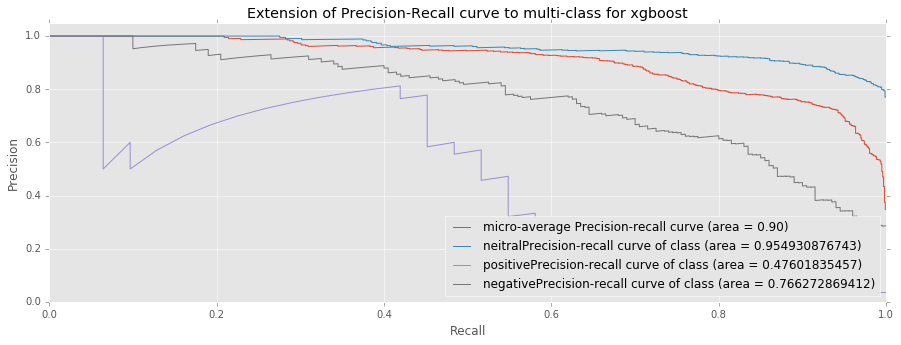

In [81]:
xgboost_classifier = [{'type': 'xgboost', 'y_score': xgboost_result['y_score_multi']}]
prec_recall_draw(xgboost_classifier, label_binarize(xgboost_result['y_test'], classes=[0, 1, 2]), class_labels=['neitral', 'positive', 'negative'])

In [82]:
xgboost_result['clf_obj'].save_model('sentitrigram_xgboost.model')

AttributeError: 'XGBClassifier' object has no attribute 'save_model'

In [ ]:
print "compute roc-auc.."   
def draw_roc_auc(y_test, y_score):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    # Compute ROC curve and ROC area for each class
    for i in range(y_test.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
            
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"]) 
        
    # draw plots
    draw_roc_for_n_class(fpr, tpr, roc_auc, ['negative', 'neitral', 'positive'], "xgboost") 


draw_roc_auc(xgboost_result['y_test'], xgboost_result['y_score'])


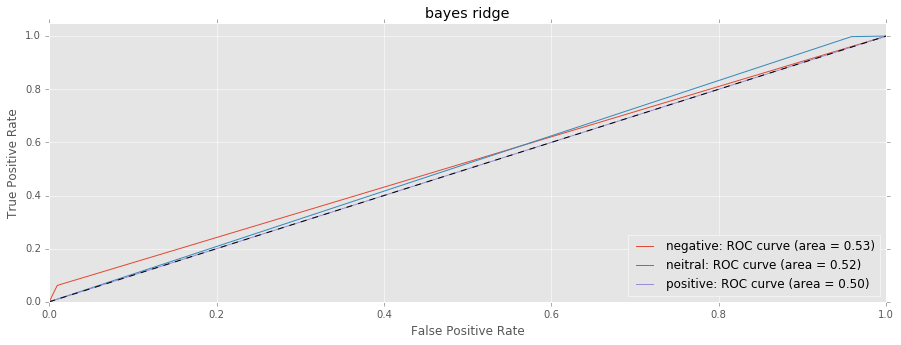

In [21]:
roc_auc_for_classifiers(classifiers, train, targets)

fitting the model ... 
compute roc-auc..


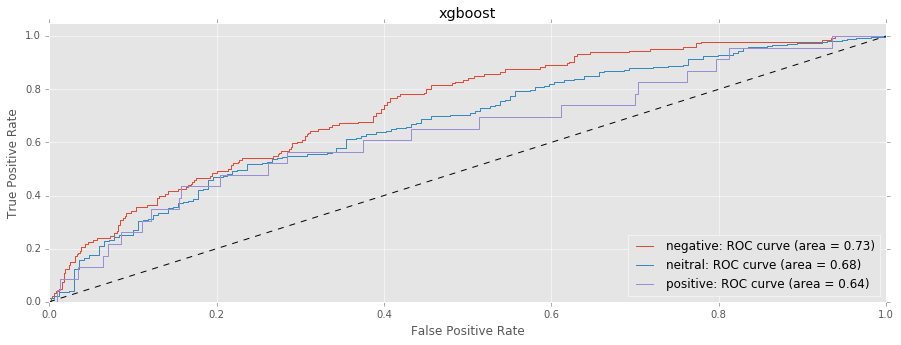

In [17]:
y_score = xgboost_test(train, target_orig)

In [15]:
test_targets = target_three_classes(test['target'])
test_targets_bin = label_binarize(test_targets, classes=[-1, 0, 1])
test.drop('target', axis=1, inplace=True)

print test.shape
print test_targets.unique()

(958, 52131)
[ 1.  0. -1.]


In [47]:
#test_prev = test.copy()
#test_prev.drop(test_prev.index[0:1], inplace=True)
#test_targets.drop(test_targets.index[0:1], inplace=True)
#test_prev = test_prev.fillna(0)
#test_prev = test_prev.apply(pd.to_numeric, errors='coerce')
#test = test_prev

print test_prev.shape
print test_targets.shape
print test.shape

(957, 52131)
(957,)
(957, 52131)


In [71]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.metrics import label_ranking_average_precision_score
from sklearn.metrics import f1_score

target_xgboost = train_targets.copy()
target_xgboost[target_xgboost == -1] = 2

test_xgboost = test_targets.copy()
test_xgboost[test_xgboost == -1] = 2

#test_xgboost = label_binarize(test_xgboost, classes=[0, 1, 2])

X_train, X_test, y_train, y_test = train_test_split(train, target_xgboost,
                                                        test_size=.3, random_state=0)

def xgboost_objective(params):
    xgb_clf = xgb.XGBClassifier(missing=np.nan, nthread=4, seed=13, 
                                 n_estimators=int(params['n_estimators']),
                                 base_score=params['base_score'],
                                 max_depth=int(params['max_depth']),
                                 max_delta_step=int(params['max_delta_step']),
                                 min_child_weight=params['min_child_weight'],
                                 learning_rate=params['learning_rate'],
                                 subsample=params['subsample'],
                                 scale_pos_weight=params['scale_pos_weight'],
                                 colsample_bytree=params['colsample_bytree'])
    # 30
    xgb_clf.fit(X_train, y_train, eval_metric=['mlogloss', 'merror'], eval_set=[(X_test, y_test)], early_stopping_rounds=30)
    dpred = xgb_clf.predict_proba(test)
    
    pred_class = np.argmax(dpred, axis=1)
    
    print pred_class.shape
    print pred_class[:2]
    
    print test_xgboost.shape
    print test_xgboost[:2]
    
    #lrap = label_ranking_average_precision_score(test_xgboost, dpred)
    #print "LRAP {} params {}".format(lrap, params)
    f1 = f1_score(test_xgboost, pred_class, average='micro')
    print "f1 {} params {}".format(f1, params)
    
    return {'loss':1 - f1, 'status': STATUS_OK }
    
params = {
    'max_depth': hp.quniform("max_depth", 2, 6, 1),
    'max_delta_step': hp.quniform('max_delta_step', 1, 10, 1),
    'base_score': hp.uniform('base_score', 0.4, 1),
    'n_estimators': hp.quniform('n_estimators', 100, 10000, 1),
    'min_child_weight': hp.quniform('min_child', 1, 15, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.03),
    'subsample': hp.uniform('subsample', 0.6, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
    'scale_pos_weight': hp.uniform('scale_pos_weight', 0.2, 1.0)
}  
# 50
iteration_number = 30

trials = Trials()
best_res = fmin(fn=xgboost_objective,
                space=params,
                algo=tpe.suggest,
                max_evals=iteration_number,
                trials=trials)
print best_res


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:1.081564	validation_0-merror:0.249249
[1]	validation_0-mlogloss:1.062847	validation_0-merror:0.253754
[2]	validation_0-mlogloss:1.055133	validation_0-merror:0.253754
[3]	validation_0-mlogloss:1.044346	validation_0-merror:0.262763
[4]	validation_0-mlogloss:1.032139	validation_0-merror:0.261261
[5]	validation_0-mlogloss:1.018874	validation_0-merror:0.259760
[6]	validation_0-mlogloss:1.006885	validation_0-merror:0.259760
[7]	validation_0-mlogloss:0.992807	validation_0-merror:0.259760
[8]	validation_0-mlogloss:0.981229	validation_0-merror:0.255255
[9]	validation_0-mlogloss:0.971530	validation_0-merror:0.253754
[10]	validation_0-mlogloss:0.960419	validation_0-merror:0.253754
[11]	validation_0-mlogloss:0.949814	validation_0-merror:0.252252
[12]	validation_0-mlogloss:0.938787	validation_0-merror:0.252252
[13]	validation

(957,)
[0 0]
(957,)
0    0
1    0
dtype: float64
f1 0.781609195402 params {'colsample_bytree': 0.8739318954339452, 'scale_pos_weight': 0.4289114679603036, 'learning_rate': 0.029615283967692307, 'max_delta_step': 5.0, 'base_score': 0.6885591408906166, 'n_estimators': 2346.0, 'subsample': 0.8785876742391446, 'min_child_weight': 9.0, 'max_depth': 5.0}


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:1.088318	validation_0-merror:0.436937
[1]	validation_0-mlogloss:1.075792	validation_0-merror:0.361862
[2]	validation_0-mlogloss:1.062872	validation_0-merror:0.327327
[3]	validation_0-mlogloss:1.048936	validation_0-merror:0.274775
[4]	validation_0-mlogloss:1.040986	validation_0-merror:0.274775
[5]	validation_0-mlogloss:1.028174	validation_0-merror:0.256757
[6]	validation_0-mlogloss:1.014605	validation_0-merror:0.255255
[7]	validation_0-mlogloss:1.002436	validation_0-merror:0.252252
[8]	validation_0-mlogloss:0.990857	validation_0-merror:0.255255
[9]	validation_0-mlogloss:0.987783	validation_0-merror:0.255255
[10]	validation_0-mlogloss:0.977871	validation_0-merror:0.256757
[11]	validation_0-mlogloss:0.970543	validation_0-merror:0.258258
[12]	validation_0-mlogloss:0.968973	validation_0-merror:0.255255
[13]	validation

(957,)
[0 0]
(957,)
0    0
1    0
dtype: float64
f1 0.769070010449 params {'colsample_bytree': 0.7581900043129112, 'scale_pos_weight': 0.7963771879084904, 'learning_rate': 0.023359248188161465, 'max_delta_step': 3.0, 'base_score': 0.5689437364024854, 'n_estimators': 5766.0, 'subsample': 0.6424259623818931, 'min_child_weight': 7.0, 'max_depth': 4.0}


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:1.085522	validation_0-merror:0.348348
[1]	validation_0-mlogloss:1.077655	validation_0-merror:0.258258
[2]	validation_0-mlogloss:1.073660	validation_0-merror:0.264264
[3]	validation_0-mlogloss:1.075083	validation_0-merror:0.261261
[4]	validation_0-mlogloss:1.065739	validation_0-merror:0.328829
[5]	validation_0-mlogloss:1.056850	validation_0-merror:0.319820
[6]	validation_0-mlogloss:1.052011	validation_0-merror:0.283784
[7]	validation_0-mlogloss:1.040977	validation_0-merror:0.253754
[8]	validation_0-mlogloss:1.030271	validation_0-merror:0.255255
[9]	validation_0-mlogloss:1.029923	validation_0-merror:0.256757
[10]	validation_0-mlogloss:1.023489	validation_0-merror:0.259760
[11]	validation_0-mlogloss:1.014106	validation_0-merror:0.261261
[12]	validation_0-mlogloss:1.010631	validation_0-merror:0.262763
[13]	validation

(957,)
[0 0]
(957,)
0    0
1    0
dtype: float64
f1 0.761755485893 params {'colsample_bytree': 0.7651304304997187, 'scale_pos_weight': 0.2460245561344718, 'learning_rate': 0.020133722218798455, 'max_delta_step': 8.0, 'base_score': 0.7468052181573694, 'n_estimators': 6313.0, 'subsample': 0.802690404599828, 'min_child_weight': 3.0, 'max_depth': 3.0}


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:1.090369	validation_0-merror:0.406907
[1]	validation_0-mlogloss:1.084167	validation_0-merror:0.361862
[2]	validation_0-mlogloss:1.077153	validation_0-merror:0.387387
[3]	validation_0-mlogloss:1.079853	validation_0-merror:0.433934
[4]	validation_0-mlogloss:1.075807	validation_0-merror:0.417417
[5]	validation_0-mlogloss:1.071906	validation_0-merror:0.429429
[6]	validation_0-mlogloss:1.065281	validation_0-merror:0.399399
[7]	validation_0-mlogloss:1.062870	validation_0-merror:0.438438
[8]	validation_0-mlogloss:1.062902	validation_0-merror:0.441441
[9]	validation_0-mlogloss:1.061579	validation_0-merror:0.453453
[10]	validation_0-mlogloss:1.053530	validation_0-merror:0.417417
[11]	validation_0-mlogloss:1.053467	validation_0-merror:0.429429
[12]	validation_0-mlogloss:1.058024	validation_0-merror:0.442943
[13]	validation

(957,)
[0 0]
(957,)
0    0
1    0
dtype: float64
f1 0.772204806688 params {'colsample_bytree': 0.6199986650131059, 'scale_pos_weight': 0.30251525762720033, 'learning_rate': 0.021600903484051248, 'max_delta_step': 4.0, 'base_score': 0.6592170905114092, 'n_estimators': 965.0, 'subsample': 0.6420688508870701, 'min_child_weight': 3.0, 'max_depth': 5.0}


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:1.089126	validation_0-merror:0.256757
[1]	validation_0-mlogloss:1.076730	validation_0-merror:0.258258
[2]	validation_0-mlogloss:1.070858	validation_0-merror:0.252252
[3]	validation_0-mlogloss:1.060159	validation_0-merror:0.258258
[4]	validation_0-mlogloss:1.052539	validation_0-merror:0.253754
[5]	validation_0-mlogloss:1.044718	validation_0-merror:0.255255
[6]	validation_0-mlogloss:1.035834	validation_0-merror:0.255255
[7]	validation_0-mlogloss:1.025545	validation_0-merror:0.255255
[8]	validation_0-mlogloss:1.015519	validation_0-merror:0.253754
[9]	validation_0-mlogloss:1.014422	validation_0-merror:0.255255
[10]	validation_0-mlogloss:1.008122	validation_0-merror:0.255255
[11]	validation_0-mlogloss:0.999259	validation_0-merror:0.255255
[12]	validation_0-mlogloss:0.994478	validation_0-merror:0.253754
[13]	validation

(957,)
[0 0]
(957,)
0    0
1    0
dtype: float64
f1 0.76802507837 params {'colsample_bytree': 0.8862196605882628, 'scale_pos_weight': 0.23197037931997935, 'learning_rate': 0.01882789514186331, 'max_delta_step': 2.0, 'base_score': 0.8023318918047861, 'n_estimators': 1941.0, 'subsample': 0.8095333279818704, 'min_child_weight': 12.0, 'max_depth': 4.0}


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:1.082240	validation_0-merror:0.276276
[1]	validation_0-mlogloss:1.069622	validation_0-merror:0.262763
[2]	validation_0-mlogloss:1.053852	validation_0-merror:0.255255
[3]	validation_0-mlogloss:1.045782	validation_0-merror:0.253754
[4]	validation_0-mlogloss:1.038541	validation_0-merror:0.264264
[5]	validation_0-mlogloss:1.026603	validation_0-merror:0.262763
[6]	validation_0-mlogloss:1.015190	validation_0-merror:0.253754
[7]	validation_0-mlogloss:1.002369	validation_0-merror:0.252252
[8]	validation_0-mlogloss:0.990529	validation_0-merror:0.252252
[9]	validation_0-mlogloss:0.981450	validation_0-merror:0.262763
[10]	validation_0-mlogloss:0.977819	validation_0-merror:0.268769
[11]	validation_0-mlogloss:0.966747	validation_0-merror:0.264264
[12]	validation_0-mlogloss:0.964322	validation_0-merror:0.268769
[13]	validation

(957,)
[0 0]
(957,)
0    0
1    0
dtype: float64
f1 0.764890282132 params {'colsample_bytree': 0.8405769752769505, 'scale_pos_weight': 0.41051587967793113, 'learning_rate': 0.025811987040444663, 'max_delta_step': 7.0, 'base_score': 0.6005796228930116, 'n_estimators': 1401.0, 'subsample': 0.9466548171401592, 'min_child_weight': 2.0, 'max_depth': 3.0}


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:1.088490	validation_0-merror:0.478979
[1]	validation_0-mlogloss:1.087602	validation_0-merror:0.486486
[2]	validation_0-mlogloss:1.088998	validation_0-merror:0.510511
[3]	validation_0-mlogloss:1.090278	validation_0-merror:0.501502
[4]	validation_0-mlogloss:1.082969	validation_0-merror:0.496997
[5]	validation_0-mlogloss:1.081733	validation_0-merror:0.515015
[6]	validation_0-mlogloss:1.082497	validation_0-merror:0.524024
[7]	validation_0-mlogloss:1.086912	validation_0-merror:0.522523
[8]	validation_0-mlogloss:1.084108	validation_0-merror:0.515015
[9]	validation_0-mlogloss:1.094465	validation_0-merror:0.551051
[10]	validation_0-mlogloss:1.095476	validation_0-merror:0.564565
[11]	validation_0-mlogloss:1.101014	validation_0-merror:0.567568
[12]	validation_0-mlogloss:1.105631	validation_0-merror:0.579580
[13]	validation

(957,)
[0 0]
(957,)
0    0
1    0
dtype: float64
f1 0.792058516196 params {'colsample_bytree': 0.6389569596049459, 'scale_pos_weight': 0.4146078206511208, 'learning_rate': 0.027779786593098342, 'max_delta_step': 6.0, 'base_score': 0.4534542233813451, 'n_estimators': 6092.0, 'subsample': 0.8282126500581627, 'min_child_weight': 2.0, 'max_depth': 6.0}


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:1.097419	validation_0-merror:0.767267
[1]	validation_0-mlogloss:1.093191	validation_0-merror:0.486486
[2]	validation_0-mlogloss:1.089151	validation_0-merror:0.509009
[3]	validation_0-mlogloss:1.089840	validation_0-merror:0.477477
[4]	validation_0-mlogloss:1.082424	validation_0-merror:0.444444
[5]	validation_0-mlogloss:1.077290	validation_0-merror:0.420420
[6]	validation_0-mlogloss:1.068723	validation_0-merror:0.402402
[7]	validation_0-mlogloss:1.066190	validation_0-merror:0.399399
[8]	validation_0-mlogloss:1.059429	validation_0-merror:0.391892
[9]	validation_0-mlogloss:1.059744	validation_0-merror:0.408408
[10]	validation_0-mlogloss:1.052738	validation_0-merror:0.388889
[11]	validation_0-mlogloss:1.051937	validation_0-merror:0.393393
[12]	validation_0-mlogloss:1.052413	validation_0-merror:0.405405
[13]	validation

(957,)
[0 0]
(957,)
0    0
1    0
dtype: float64
f1 0.76698014629 params {'colsample_bytree': 0.6505798605773329, 'scale_pos_weight': 0.449235488902072, 'learning_rate': 0.017596900682887225, 'max_delta_step': 9.0, 'base_score': 0.9992505228742916, 'n_estimators': 5592.0, 'subsample': 0.6566521076306963, 'min_child_weight': 3.0, 'max_depth': 4.0}


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:1.089985	validation_0-merror:0.270270
[1]	validation_0-mlogloss:1.079031	validation_0-merror:0.252252
[2]	validation_0-mlogloss:1.074006	validation_0-merror:0.250751
[3]	validation_0-mlogloss:1.067374	validation_0-merror:0.252252
[4]	validation_0-mlogloss:1.060297	validation_0-merror:0.253754
[5]	validation_0-mlogloss:1.051805	validation_0-merror:0.253754
[6]	validation_0-mlogloss:1.042807	validation_0-merror:0.255255
[7]	validation_0-mlogloss:1.035401	validation_0-merror:0.252252
[8]	validation_0-mlogloss:1.029830	validation_0-merror:0.253754
[9]	validation_0-mlogloss:1.025216	validation_0-merror:0.252252
[10]	validation_0-mlogloss:1.018911	validation_0-merror:0.255255
[11]	validation_0-mlogloss:1.016316	validation_0-merror:0.255255
[12]	validation_0-mlogloss:1.008511	validation_0-merror:0.255255
[13]	validation

(957,)
[0 0]
(957,)
0    0
1    0
dtype: float64
f1 0.774294670846 params {'colsample_bytree': 0.701662826904287, 'scale_pos_weight': 0.9584873326722159, 'learning_rate': 0.01478933551943857, 'max_delta_step': 2.0, 'base_score': 0.6558649875889305, 'n_estimators': 3941.0, 'subsample': 0.8600614421886996, 'min_child_weight': 10.0, 'max_depth': 5.0}


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:1.078436	validation_0-merror:0.249249
[1]	validation_0-mlogloss:1.059047	validation_0-merror:0.253754
[2]	validation_0-mlogloss:1.051019	validation_0-merror:0.256757
[3]	validation_0-mlogloss:1.038270	validation_0-merror:0.256757
[4]	validation_0-mlogloss:1.026603	validation_0-merror:0.256757
[5]	validation_0-mlogloss:1.013947	validation_0-merror:0.252252
[6]	validation_0-mlogloss:1.000300	validation_0-merror:0.253754
[7]	validation_0-mlogloss:0.988581	validation_0-merror:0.253754
[8]	validation_0-mlogloss:0.977350	validation_0-merror:0.253754
[9]	validation_0-mlogloss:0.969883	validation_0-merror:0.253754
[10]	validation_0-mlogloss:0.958426	validation_0-merror:0.255255
[11]	validation_0-mlogloss:0.951990	validation_0-merror:0.256757
[12]	validation_0-mlogloss:0.940123	validation_0-merror:0.256757
[13]	validation

(957,)
[0 0]
(957,)
0    0
1    0
dtype: float64
f1 0.777429467085 params {'colsample_bytree': 0.7424959418874832, 'scale_pos_weight': 0.5049156334554732, 'learning_rate': 0.029242438675174773, 'max_delta_step': 4.0, 'base_score': 0.8911482425726851, 'n_estimators': 8304.0, 'subsample': 0.9123615595169865, 'min_child_weight': 12.0, 'max_depth': 5.0}


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:1.090729	validation_0-merror:0.286787
[1]	validation_0-mlogloss:1.088268	validation_0-merror:0.375375
[2]	validation_0-mlogloss:1.079105	validation_0-merror:0.283784
[3]	validation_0-mlogloss:1.080310	validation_0-merror:0.406907
[4]	validation_0-mlogloss:1.073812	validation_0-merror:0.408408
[5]	validation_0-mlogloss:1.072367	validation_0-merror:0.411411
[6]	validation_0-mlogloss:1.070073	validation_0-merror:0.405405
[7]	validation_0-mlogloss:1.064426	validation_0-merror:0.354354
[8]	validation_0-mlogloss:1.056877	validation_0-merror:0.307808
[9]	validation_0-mlogloss:1.055555	validation_0-merror:0.345345
[10]	validation_0-mlogloss:1.051717	validation_0-merror:0.351351
[11]	validation_0-mlogloss:1.049950	validation_0-merror:0.357357
[12]	validation_0-mlogloss:1.050764	validation_0-merror:0.382883
[13]	validation

(957,)
[0 0]
(957,)
0    0
1    0
dtype: float64
f1 0.76802507837 params {'colsample_bytree': 0.7244628764583512, 'scale_pos_weight': 0.30372868742781667, 'learning_rate': 0.014051278037298562, 'max_delta_step': 8.0, 'base_score': 0.7348784226656926, 'n_estimators': 1185.0, 'subsample': 0.7678034465394823, 'min_child_weight': 3.0, 'max_depth': 4.0}


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:1.082192	validation_0-merror:0.271772
[1]	validation_0-mlogloss:1.066576	validation_0-merror:0.255255
[2]	validation_0-mlogloss:1.059726	validation_0-merror:0.253754
[3]	validation_0-mlogloss:1.049024	validation_0-merror:0.247748
[4]	validation_0-mlogloss:1.038869	validation_0-merror:0.250751
[5]	validation_0-mlogloss:1.029326	validation_0-merror:0.252252
[6]	validation_0-mlogloss:1.019658	validation_0-merror:0.258258
[7]	validation_0-mlogloss:1.007669	validation_0-merror:0.250751
[8]	validation_0-mlogloss:0.996487	validation_0-merror:0.247748
[9]	validation_0-mlogloss:0.986017	validation_0-merror:0.247748
[10]	validation_0-mlogloss:0.974689	validation_0-merror:0.253754
[11]	validation_0-mlogloss:0.964136	validation_0-merror:0.253754
[12]	validation_0-mlogloss:0.953354	validation_0-merror:0.255255
[13]	validation

(957,)
[0 0]
(957,)
0    0
1    0
dtype: float64
f1 0.773249738767 params {'colsample_bytree': 0.8661086606561865, 'scale_pos_weight': 0.5582113958777162, 'learning_rate': 0.024233401548082067, 'max_delta_step': 9.0, 'base_score': 0.47459502245197577, 'n_estimators': 6315.0, 'subsample': 0.924561450523434, 'min_child_weight': 13.0, 'max_depth': 5.0}


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:1.088160	validation_0-merror:0.418919
[1]	validation_0-mlogloss:1.074221	validation_0-merror:0.259760
[2]	validation_0-mlogloss:1.068255	validation_0-merror:0.255255
[3]	validation_0-mlogloss:1.058921	validation_0-merror:0.253754
[4]	validation_0-mlogloss:1.050194	validation_0-merror:0.255255
[5]	validation_0-mlogloss:1.039380	validation_0-merror:0.255255
[6]	validation_0-mlogloss:1.030060	validation_0-merror:0.255255
[7]	validation_0-mlogloss:1.020158	validation_0-merror:0.255255
[8]	validation_0-mlogloss:1.011180	validation_0-merror:0.256757
[9]	validation_0-mlogloss:1.005229	validation_0-merror:0.253754
[10]	validation_0-mlogloss:0.996503	validation_0-merror:0.253754
[11]	validation_0-mlogloss:0.990621	validation_0-merror:0.256757
[12]	validation_0-mlogloss:0.983360	validation_0-merror:0.256757
[13]	validation

(957,)
[0 0]
(957,)
0    0
1    0
dtype: float64
f1 0.782654127482 params {'colsample_bytree': 0.9855822460533539, 'scale_pos_weight': 0.4621557602405239, 'learning_rate': 0.020412113540178228, 'max_delta_step': 2.0, 'base_score': 0.4315335694347931, 'n_estimators': 2034.0, 'subsample': 0.8645315769799858, 'min_child_weight': 13.0, 'max_depth': 5.0}


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:1.095990	validation_0-merror:0.578078
[1]	validation_0-mlogloss:1.088748	validation_0-merror:0.414414
[2]	validation_0-mlogloss:1.078414	validation_0-merror:0.298799
[3]	validation_0-mlogloss:1.079738	validation_0-merror:0.318318
[4]	validation_0-mlogloss:1.080820	validation_0-merror:0.367868
[5]	validation_0-mlogloss:1.077761	validation_0-merror:0.328829
[6]	validation_0-mlogloss:1.068185	validation_0-merror:0.280781
[7]	validation_0-mlogloss:1.063159	validation_0-merror:0.271772
[8]	validation_0-mlogloss:1.053321	validation_0-merror:0.256757
[9]	validation_0-mlogloss:1.052384	validation_0-merror:0.267267
[10]	validation_0-mlogloss:1.043088	validation_0-merror:0.255255
[11]	validation_0-mlogloss:1.038476	validation_0-merror:0.250751
[12]	validation_0-mlogloss:1.032074	validation_0-merror:0.252252
[13]	validation

(957,)
[0 0]
(957,)
0    0
1    0
dtype: float64
f1 0.763845350052 params {'colsample_bytree': 0.7918581576358503, 'scale_pos_weight': 0.3185342627713292, 'learning_rate': 0.01736500664939674, 'max_delta_step': 4.0, 'base_score': 0.8412470012913114, 'n_estimators': 2213.0, 'subsample': 0.6612863747599186, 'min_child_weight': 3.0, 'max_depth': 3.0}


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:1.085886	validation_0-merror:0.300300
[1]	validation_0-mlogloss:1.070559	validation_0-merror:0.259760
[2]	validation_0-mlogloss:1.060702	validation_0-merror:0.258258
[3]	validation_0-mlogloss:1.047029	validation_0-merror:0.255255
[4]	validation_0-mlogloss:1.034313	validation_0-merror:0.255255
[5]	validation_0-mlogloss:1.021372	validation_0-merror:0.255255
[6]	validation_0-mlogloss:1.011195	validation_0-merror:0.258258
[7]	validation_0-mlogloss:0.997265	validation_0-merror:0.255255
[8]	validation_0-mlogloss:0.986833	validation_0-merror:0.256757
[9]	validation_0-mlogloss:0.976955	validation_0-merror:0.256757
[10]	validation_0-mlogloss:0.962533	validation_0-merror:0.255255
[11]	validation_0-mlogloss:0.958498	validation_0-merror:0.255255
[12]	validation_0-mlogloss:0.947435	validation_0-merror:0.255255
[13]	validation

(957,)
[0 0]
(957,)
0    0
1    0
dtype: float64
f1 0.769070010449 params {'colsample_bytree': 0.6355814559156833, 'scale_pos_weight': 0.2708352225307879, 'learning_rate': 0.027836063384428983, 'max_delta_step': 6.0, 'base_score': 0.9084978228610991, 'n_estimators': 6984.0, 'subsample': 0.9775400832478583, 'min_child_weight': 11.0, 'max_depth': 4.0}


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:1.086460	validation_0-merror:0.256757
[1]	validation_0-mlogloss:1.076990	validation_0-merror:0.250751
[2]	validation_0-mlogloss:1.071369	validation_0-merror:0.250751
[3]	validation_0-mlogloss:1.062402	validation_0-merror:0.250751
[4]	validation_0-mlogloss:1.054756	validation_0-merror:0.250751
[5]	validation_0-mlogloss:1.046173	validation_0-merror:0.250751
[6]	validation_0-mlogloss:1.036142	validation_0-merror:0.253754
[7]	validation_0-mlogloss:1.025863	validation_0-merror:0.253754
[8]	validation_0-mlogloss:1.017544	validation_0-merror:0.253754
[9]	validation_0-mlogloss:1.009299	validation_0-merror:0.253754
[10]	validation_0-mlogloss:1.000983	validation_0-merror:0.253754
[11]	validation_0-mlogloss:0.996605	validation_0-merror:0.253754
[12]	validation_0-mlogloss:0.988583	validation_0-merror:0.253754
[13]	validation

(957,)
[0 0]
(957,)
0    0
1    0
dtype: float64
f1 0.769070010449 params {'colsample_bytree': 0.6780497847395665, 'scale_pos_weight': 0.7641840892111316, 'learning_rate': 0.01769128180219213, 'max_delta_step': 2.0, 'base_score': 0.9537753965557723, 'n_estimators': 3308.0, 'subsample': 0.8997369045274755, 'min_child_weight': 14.0, 'max_depth': 5.0}


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:1.089213	validation_0-merror:0.253754
[1]	validation_0-mlogloss:1.078940	validation_0-merror:0.253754
[2]	validation_0-mlogloss:1.072295	validation_0-merror:0.253754
[3]	validation_0-mlogloss:1.062377	validation_0-merror:0.253754
[4]	validation_0-mlogloss:1.054914	validation_0-merror:0.253754
[5]	validation_0-mlogloss:1.047793	validation_0-merror:0.253754
[6]	validation_0-mlogloss:1.037970	validation_0-merror:0.253754
[7]	validation_0-mlogloss:1.029282	validation_0-merror:0.253754
[8]	validation_0-mlogloss:1.020566	validation_0-merror:0.253754
[9]	validation_0-mlogloss:1.013422	validation_0-merror:0.253754
[10]	validation_0-mlogloss:1.005229	validation_0-merror:0.253754
[11]	validation_0-mlogloss:1.000770	validation_0-merror:0.253754
[12]	validation_0-mlogloss:0.996649	validation_0-merror:0.253754
[13]	validation

(957,)
[0 0]
(957,)
0    0
1    0
dtype: float64
f1 0.758620689655 params {'colsample_bytree': 0.7001048751899173, 'scale_pos_weight': 0.8025958726408313, 'learning_rate': 0.01583361301447416, 'max_delta_step': 2.0, 'base_score': 0.5233972426323402, 'n_estimators': 9349.0, 'subsample': 0.7963849550095061, 'min_child_weight': 14.0, 'max_depth': 3.0}


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:1.090688	validation_0-merror:0.253754
[1]	validation_0-mlogloss:1.083082	validation_0-merror:0.253754
[2]	validation_0-mlogloss:1.078930	validation_0-merror:0.253754
[3]	validation_0-mlogloss:1.071548	validation_0-merror:0.253754
[4]	validation_0-mlogloss:1.064611	validation_0-merror:0.253754
[5]	validation_0-mlogloss:1.060893	validation_0-merror:0.253754
[6]	validation_0-mlogloss:1.053929	validation_0-merror:0.253754
[7]	validation_0-mlogloss:1.049422	validation_0-merror:0.253754
[8]	validation_0-mlogloss:1.045201	validation_0-merror:0.253754
[9]	validation_0-mlogloss:1.038796	validation_0-merror:0.253754
[10]	validation_0-mlogloss:1.032238	validation_0-merror:0.253754
[11]	validation_0-mlogloss:1.026051	validation_0-merror:0.253754
[12]	validation_0-mlogloss:1.019262	validation_0-merror:0.253754
[13]	validation

(957,)
[0 0]
(957,)
0    0
1    0
dtype: float64
f1 0.758620689655 params {'colsample_bytree': 0.8365112438437619, 'scale_pos_weight': 0.28698585592072184, 'learning_rate': 0.011849556612446778, 'max_delta_step': 4.0, 'base_score': 0.5151679776257312, 'n_estimators': 110.0, 'subsample': 0.8991622065985414, 'min_child_weight': 5.0, 'max_depth': 2.0}


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:1.095705	validation_0-merror:0.450450
[1]	validation_0-mlogloss:1.091907	validation_0-merror:0.411411
[2]	validation_0-mlogloss:1.086268	validation_0-merror:0.415916
[3]	validation_0-mlogloss:1.081522	validation_0-merror:0.408408
[4]	validation_0-mlogloss:1.077648	validation_0-merror:0.414414
[5]	validation_0-mlogloss:1.072193	validation_0-merror:0.390390
[6]	validation_0-mlogloss:1.067388	validation_0-merror:0.406907
[7]	validation_0-mlogloss:1.063357	validation_0-merror:0.409910
[8]	validation_0-mlogloss:1.058125	validation_0-merror:0.400901
[9]	validation_0-mlogloss:1.054455	validation_0-merror:0.390390
[10]	validation_0-mlogloss:1.049749	validation_0-merror:0.388889
[11]	validation_0-mlogloss:1.047646	validation_0-merror:0.394895
[12]	validation_0-mlogloss:1.041242	validation_0-merror:0.388889
[13]	validation

(957,)
[0 0]
(957,)
0    0
1    0
dtype: float64
f1 0.78578892372 params {'colsample_bytree': 0.8784986580589766, 'scale_pos_weight': 0.617915918108495, 'learning_rate': 0.01100828162027363, 'max_delta_step': 2.0, 'base_score': 0.9259968378064084, 'n_estimators': 526.0, 'subsample': 0.9669541935806596, 'min_child_weight': 7.0, 'max_depth': 5.0}


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:1.087112	validation_0-merror:0.285285
[1]	validation_0-mlogloss:1.073663	validation_0-merror:0.283784
[2]	validation_0-mlogloss:1.057490	validation_0-merror:0.252252
[3]	validation_0-mlogloss:1.045247	validation_0-merror:0.253754
[4]	validation_0-mlogloss:1.032954	validation_0-merror:0.253754
[5]	validation_0-mlogloss:1.019038	validation_0-merror:0.253754
[6]	validation_0-mlogloss:1.006238	validation_0-merror:0.253754
[7]	validation_0-mlogloss:0.994371	validation_0-merror:0.253754
[8]	validation_0-mlogloss:0.981973	validation_0-merror:0.255255
[9]	validation_0-mlogloss:0.973982	validation_0-merror:0.253754
[10]	validation_0-mlogloss:0.963471	validation_0-merror:0.252252
[11]	validation_0-mlogloss:0.953422	validation_0-merror:0.255255
[12]	validation_0-mlogloss:0.941678	validation_0-merror:0.255255
[13]	validation

(957,)
[0 0]
(957,)
0    0
1    0
dtype: float64
f1 0.762800417973 params {'colsample_bytree': 0.7729154208697534, 'scale_pos_weight': 0.6462460286288838, 'learning_rate': 0.025428782145635202, 'max_delta_step': 2.0, 'base_score': 0.6311693385309614, 'n_estimators': 6594.0, 'subsample': 0.9608246099250033, 'min_child_weight': 13.0, 'max_depth': 3.0}


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:1.094518	validation_0-merror:0.441441
[1]	validation_0-mlogloss:1.088280	validation_0-merror:0.339339
[2]	validation_0-mlogloss:1.082366	validation_0-merror:0.315315
[3]	validation_0-mlogloss:1.078214	validation_0-merror:0.318318
[4]	validation_0-mlogloss:1.074313	validation_0-merror:0.316817
[5]	validation_0-mlogloss:1.070437	validation_0-merror:0.310811
[6]	validation_0-mlogloss:1.066943	validation_0-merror:0.313814
[7]	validation_0-mlogloss:1.064055	validation_0-merror:0.292793
[8]	validation_0-mlogloss:1.060233	validation_0-merror:0.286787
[9]	validation_0-mlogloss:1.056153	validation_0-merror:0.285285
[10]	validation_0-mlogloss:1.049851	validation_0-merror:0.300300
[11]	validation_0-mlogloss:1.047948	validation_0-merror:0.292793
[12]	validation_0-mlogloss:1.047411	validation_0-merror:0.318318
[13]	validation

(957,)
[0 0]
(957,)
0    0
1    0
dtype: float64
f1 0.787878787879 params {'colsample_bytree': 0.9431896030905077, 'scale_pos_weight': 0.6705810134501782, 'learning_rate': 0.010744888385829553, 'max_delta_step': 6.0, 'base_score': 0.9981215443425233, 'n_estimators': 4466.0, 'subsample': 0.7058324321403846, 'min_child_weight': 6.0, 'max_depth': 6.0}


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:1.097779	validation_0-merror:0.469970
[1]	validation_0-mlogloss:1.091032	validation_0-merror:0.339339
[2]	validation_0-mlogloss:1.085584	validation_0-merror:0.288288
[3]	validation_0-mlogloss:1.082237	validation_0-merror:0.277778
[4]	validation_0-mlogloss:1.078849	validation_0-merror:0.295796
[5]	validation_0-mlogloss:1.075940	validation_0-merror:0.307808
[6]	validation_0-mlogloss:1.073421	validation_0-merror:0.334835
[7]	validation_0-mlogloss:1.072613	validation_0-merror:0.312312
[8]	validation_0-mlogloss:1.067677	validation_0-merror:0.289790
[9]	validation_0-mlogloss:1.067239	validation_0-merror:0.340841
[10]	validation_0-mlogloss:1.061339	validation_0-merror:0.303303
[11]	validation_0-mlogloss:1.060450	validation_0-merror:0.324324
[12]	validation_0-mlogloss:1.056291	validation_0-merror:0.349850
[13]	validation

(957,)
[0 0]
(957,)
0    0
1    0
dtype: float64
f1 0.784743991641 params {'colsample_bytree': 0.9624185557950176, 'scale_pos_weight': 0.673234195999605, 'learning_rate': 0.010054843131268372, 'max_delta_step': 6.0, 'base_score': 0.43748657561664794, 'n_estimators': 4482.0, 'subsample': 0.6974826752658453, 'min_child_weight': 5.0, 'max_depth': 6.0}


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:1.099406	validation_0-merror:0.680180
[1]	validation_0-mlogloss:1.095254	validation_0-merror:0.533033
[2]	validation_0-mlogloss:1.104961	validation_0-merror:0.705706
[3]	validation_0-mlogloss:1.111245	validation_0-merror:0.749249
[4]	validation_0-mlogloss:1.113070	validation_0-merror:0.740240
[5]	validation_0-mlogloss:1.112891	validation_0-merror:0.725225
[6]	validation_0-mlogloss:1.120785	validation_0-merror:0.776276
[7]	validation_0-mlogloss:1.127649	validation_0-merror:0.782282
[8]	validation_0-mlogloss:1.123922	validation_0-merror:0.767267
[9]	validation_0-mlogloss:1.124248	validation_0-merror:0.758258
[10]	validation_0-mlogloss:1.122086	validation_0-merror:0.734234
[11]	validation_0-mlogloss:1.127390	validation_0-merror:0.743243
[12]	validation_0-mlogloss:1.131164	validation_0-merror:0.755255
[13]	validation

(957,)
[0 0]
(957,)
0    0
1    0
dtype: float64
f1 0.799373040752 params {'colsample_bytree': 0.9292469893929366, 'scale_pos_weight': 0.878286711154542, 'learning_rate': 0.027365034314020282, 'max_delta_step': 7.0, 'base_score': 0.819088672579848, 'n_estimators': 7687.0, 'subsample': 0.7309888142855718, 'min_child_weight': 1.0, 'max_depth': 6.0}


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:1.098209	validation_0-merror:0.623123
[1]	validation_0-mlogloss:1.101966	validation_0-merror:0.735736
[2]	validation_0-mlogloss:1.103463	validation_0-merror:0.678679
[3]	validation_0-mlogloss:1.105482	validation_0-merror:0.698198
[4]	validation_0-mlogloss:1.109599	validation_0-merror:0.678679
[5]	validation_0-mlogloss:1.114575	validation_0-merror:0.764264
[6]	validation_0-mlogloss:1.106948	validation_0-merror:0.665165
[7]	validation_0-mlogloss:1.106715	validation_0-merror:0.677177
[8]	validation_0-mlogloss:1.102194	validation_0-merror:0.639640
[9]	validation_0-mlogloss:1.107700	validation_0-merror:0.653153
[10]	validation_0-mlogloss:1.110224	validation_0-merror:0.642643
[11]	validation_0-mlogloss:1.113677	validation_0-merror:0.681682
[12]	validation_0-mlogloss:1.116552	validation_0-merror:0.684685
[13]	validation

(957,)
[0 0]
(957,)
0    0
1    0
dtype: float64
f1 0.800417972832 params {'colsample_bytree': 0.9169189922400668, 'scale_pos_weight': 0.9683869928314955, 'learning_rate': 0.027495603871745655, 'max_delta_step': 7.0, 'base_score': 0.8087821074618209, 'n_estimators': 7760.0, 'subsample': 0.7457826694051857, 'min_child_weight': 2.0, 'max_depth': 6.0}


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:1.090814	validation_0-merror:0.498498
[1]	validation_0-mlogloss:1.082145	validation_0-merror:0.399399
[2]	validation_0-mlogloss:1.069925	validation_0-merror:0.396396
[3]	validation_0-mlogloss:1.056726	validation_0-merror:0.327327
[4]	validation_0-mlogloss:1.052794	validation_0-merror:0.334835
[5]	validation_0-mlogloss:1.048630	validation_0-merror:0.369369
[6]	validation_0-mlogloss:1.040226	validation_0-merror:0.379880
[7]	validation_0-mlogloss:1.041276	validation_0-merror:0.390390
[8]	validation_0-mlogloss:1.034802	validation_0-merror:0.378378
[9]	validation_0-mlogloss:1.034981	validation_0-merror:0.402402
[10]	validation_0-mlogloss:1.028612	validation_0-merror:0.403904
[11]	validation_0-mlogloss:1.021448	validation_0-merror:0.396396
[12]	validation_0-mlogloss:1.021237	validation_0-merror:0.399399
[13]	validation

(957,)
[0 0]
(957,)
0    0
1    0
dtype: float64
f1 0.792058516196 params {'colsample_bytree': 0.925809957938069, 'scale_pos_weight': 0.998275082518657, 'learning_rate': 0.027366838651103263, 'max_delta_step': 8.0, 'base_score': 0.8229008827029549, 'n_estimators': 7769.0, 'subsample': 0.7543081489313169, 'min_child_weight': 5.0, 'max_depth': 6.0}


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:1.099463	validation_0-merror:0.743243
[1]	validation_0-mlogloss:1.107500	validation_0-merror:0.779279
[2]	validation_0-mlogloss:1.101512	validation_0-merror:0.752252
[3]	validation_0-mlogloss:1.104846	validation_0-merror:0.750751
[4]	validation_0-mlogloss:1.097385	validation_0-merror:0.713213
[5]	validation_0-mlogloss:1.096944	validation_0-merror:0.707207
[6]	validation_0-mlogloss:1.097552	validation_0-merror:0.636637
[7]	validation_0-mlogloss:1.098221	validation_0-merror:0.635135
[8]	validation_0-mlogloss:1.101931	validation_0-merror:0.713213
[9]	validation_0-mlogloss:1.110540	validation_0-merror:0.758258
[10]	validation_0-mlogloss:1.109933	validation_0-merror:0.752252
[11]	validation_0-mlogloss:1.112647	validation_0-merror:0.732733
[12]	validation_0-mlogloss:1.110448	validation_0-merror:0.734234
[13]	validation

(957,)
[0 0]
(957,)
0    0
1    0
dtype: float64
f1 0.798328108673 params {'colsample_bytree': 0.9945636957291948, 'scale_pos_weight': 0.9048598698828858, 'learning_rate': 0.023037635974745684, 'max_delta_step': 10.0, 'base_score': 0.7735330795229083, 'n_estimators': 9840.0, 'subsample': 0.6004626015586854, 'min_child_weight': 1.0, 'max_depth': 6.0}


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:1.091458	validation_0-merror:0.471471
[1]	validation_0-mlogloss:1.096801	validation_0-merror:0.608108
[2]	validation_0-mlogloss:1.092425	validation_0-merror:0.609610
[3]	validation_0-mlogloss:1.102843	validation_0-merror:0.717718
[4]	validation_0-mlogloss:1.095891	validation_0-merror:0.669670
[5]	validation_0-mlogloss:1.095704	validation_0-merror:0.716216
[6]	validation_0-mlogloss:1.095590	validation_0-merror:0.690691
[7]	validation_0-mlogloss:1.102339	validation_0-merror:0.723724
[8]	validation_0-mlogloss:1.099438	validation_0-merror:0.638138
[9]	validation_0-mlogloss:1.100184	validation_0-merror:0.644144
[10]	validation_0-mlogloss:1.108082	validation_0-merror:0.635135
[11]	validation_0-mlogloss:1.112079	validation_0-merror:0.668168
[12]	validation_0-mlogloss:1.113832	validation_0-merror:0.690691
[13]	validation

(957,)
[0 0]
(957,)
0    0
1    0
dtype: float64
f1 0.798328108673 params {'colsample_bytree': 0.9161457084764507, 'scale_pos_weight': 0.8852638063023506, 'learning_rate': 0.02996988903583452, 'max_delta_step': 7.0, 'base_score': 0.8747113542388708, 'n_estimators': 8459.0, 'subsample': 0.761415799401735, 'min_child_weight': 1.0, 'max_depth': 6.0}


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:1.098636	validation_0-merror:0.597598
[1]	validation_0-mlogloss:1.091074	validation_0-merror:0.573574
[2]	validation_0-mlogloss:1.095259	validation_0-merror:0.582583
[3]	validation_0-mlogloss:1.102691	validation_0-merror:0.702703
[4]	validation_0-mlogloss:1.106434	validation_0-merror:0.704204
[5]	validation_0-mlogloss:1.106468	validation_0-merror:0.693694
[6]	validation_0-mlogloss:1.112568	validation_0-merror:0.752252
[7]	validation_0-mlogloss:1.114900	validation_0-merror:0.726727
[8]	validation_0-mlogloss:1.105206	validation_0-merror:0.615616
[9]	validation_0-mlogloss:1.104269	validation_0-merror:0.599099
[10]	validation_0-mlogloss:1.110141	validation_0-merror:0.602102
[11]	validation_0-mlogloss:1.114326	validation_0-merror:0.642643
[12]	validation_0-mlogloss:1.117969	validation_0-merror:0.624625
[13]	validation

(957,)
[0 0]
(957,)
0    0
1    0
dtype: float64
f1 0.800417972832 params {'colsample_bytree': 0.8261950032492675, 'scale_pos_weight': 0.8711616913286884, 'learning_rate': 0.025217448154659403, 'max_delta_step': 7.0, 'base_score': 0.7712415134336961, 'n_estimators': 7613.0, 'subsample': 0.7255488610447045, 'min_child_weight': 1.0, 'max_depth': 6.0}


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:1.081782	validation_0-merror:0.253754
[1]	validation_0-mlogloss:1.065929	validation_0-merror:0.252252
[2]	validation_0-mlogloss:1.049769	validation_0-merror:0.253754
[3]	validation_0-mlogloss:1.035372	validation_0-merror:0.255255
[4]	validation_0-mlogloss:1.029318	validation_0-merror:0.255255
[5]	validation_0-mlogloss:1.015813	validation_0-merror:0.253754
[6]	validation_0-mlogloss:1.002771	validation_0-merror:0.253754
[7]	validation_0-mlogloss:0.990232	validation_0-merror:0.253754
[8]	validation_0-mlogloss:0.977652	validation_0-merror:0.253754
[9]	validation_0-mlogloss:0.974944	validation_0-merror:0.255255
[10]	validation_0-mlogloss:0.963701	validation_0-merror:0.255255
[11]	validation_0-mlogloss:0.953274	validation_0-merror:0.253754
[12]	validation_0-mlogloss:0.947407	validation_0-merror:0.255255
[13]	validation

(957,)
[0 0]
(957,)
0    0
1    0
dtype: float64
f1 0.759665621735 params {'colsample_bytree': 0.8418600111817439, 'scale_pos_weight': 0.735690110923752, 'learning_rate': 0.0253497420662106, 'max_delta_step': 5.0, 'base_score': 0.7033377132754964, 'n_estimators': 9247.0, 'subsample': 0.6925362066263355, 'min_child_weight': 9.0, 'max_depth': 2.0}


Will train until validation_0 error hasn't decreased in 30 rounds.
Multiple eval metrics have been passed: 'merror' will be used for early stopping.

[0]	validation_0-mlogloss:1.088613	validation_0-merror:0.540541
[1]	validation_0-mlogloss:1.082189	validation_0-merror:0.575075
[2]	validation_0-mlogloss:1.070705	validation_0-merror:0.472973
[3]	validation_0-mlogloss:1.066333	validation_0-merror:0.454955
[4]	validation_0-mlogloss:1.060422	validation_0-merror:0.447447
[5]	validation_0-mlogloss:1.051095	validation_0-merror:0.427928
[6]	validation_0-mlogloss:1.042976	validation_0-merror:0.411411
[7]	validation_0-mlogloss:1.031060	validation_0-merror:0.414414
[8]	validation_0-mlogloss:1.020512	validation_0-merror:0.406907
[9]	validation_0-mlogloss:1.009867	validation_0-merror:0.393393
[10]	validation_0-mlogloss:0.998581	validation_0-merror:0.382883
[11]	validation_0-mlogloss:0.990629	validation_0-merror:0.397898
[12]	validation_0-mlogloss:0.991340	validation_0-merror:0.418919
[13]	validation

(957,)
[0 0]
(957,)
0    0
1    0
dtype: float64
f1 0.78578892372 params {'colsample_bytree': 0.8198444395545763, 'scale_pos_weight': 0.9690439370954377, 'learning_rate': 0.029037803795976577, 'max_delta_step': 10.0, 'base_score': 0.7036484389805882, 'n_estimators': 7307.0, 'subsample': 0.6035181943243477, 'min_child_weight': 4.0, 'max_depth': 6.0}
{'colsample_bytree': 0.9169189922400668, 'scale_pos_weight': 0.9683869928314955, 'learning_rate': 0.027495603871745655, 'max_delta_step': 7.0, 'base_score': 0.8087821074618209, 'n_estimators': 7760.0, 'subsample': 0.7457826694051857, 'min_child': 2.0, 'max_depth': 6.0}


In [63]:
f1 0.792058516196 params {'colsample_bytree': 0.6389569596049459, 'scale_pos_weight': 0.4146078206511208, 'learning_rate': 0.027779786593098342, 'max_delta_step': 6.0, 'base_score': 0.4534542233813451, 'n_estimators': 6092.0, 'subsample': 0.8282126500581627, 'min_child_weight': 2.0, 'max_depth': 6.0}
f1 0.799373040752 params {'colsample_bytree': 0.9292469893929366, 'scale_pos_weight': 0.878286711154542, 'learning_rate': 0.027365034314020282, 'max_delta_step': 7.0, 'base_score': 0.819088672579848, 'n_estimators': 7687.0, 'subsample': 0.7309888142855718, 'min_child_weight': 1.0, 'max_depth': 6.0}
f1 0.800417972832 params {'colsample_bytree': 0.9169189922400668, 'scale_pos_weight': 0.9683869928314955, 'learning_rate': 0.027495603871745655, 'max_delta_step': 7.0, 'base_score': 0.8087821074618209, 'n_estimators': 7760.0, 'subsample': 0.7457826694051857, 'min_child_weight': 2.0, 'max_depth': 6.0}
0.758620689655
# confusion matrix

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [51]:
LRAP 0.867293625914 params {'colsample_bytree': 0.9739135549570389, 'scale_pos_weight': 0.363822621408984, 'learning_rate': 0.012084240846850936, 'max_delta_step': 6.0, 'base_score': 0.7459307196122833, 'n_estimators': 4859.0, 'subsample': 0.8496954123200351, 'min_child_weight': 4.0, 'max_depth': 2.0}
LRAP 0.867641936607 params {'colsample_bytree': 0.7199760203297567, 'scale_pos_weight': 0.2018687795760153, 'learning_rate': 0.015976735763162764, 'max_delta_step': 3.0, 'base_score': 0.6076033387871113, 'n_estimators': 7281.0, 'subsample': 0.7784811878279234, 'min_child_weight': 1.0, 'max_depth': 2.0}
LRAP 0.867467781261 params {'colsample_bytree': 0.8148113036821721, 'scale_pos_weight': 0.8451891671632034, 'learning_rate': 0.015951644221268362, 'max_delta_step': 1.0, 'base_score': 0.4047556493532642, 'n_estimators': 5015.0, 'subsample': 0.8281749248026687, 'min_child_weight': 15.0, 'max_depth': 3.0}

SyntaxError: invalid syntax (<ipython-input-51-6fc068c8c342>, line 1)

In [5]:
# TMP: remove?

main_features = train.ix[:, : 18]
word_vec = train.ix[:, 18:]

print word_vec.shape
print main_features.shape

column_name = [i for i in range(word_vec.shape[1])]
word_vec.columns = column_name

(2219, 52113)
